In [1]:
#Credits goes to Niklas Donges - Founder “AM GmbH” Software Agency. We are open for business so feel free to contact me for you next project: donges@am.gmbh
#URL: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

#1. Importing the libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#2. Getting data
#URL: Explation of the dataset: https://www.kaggle.com/c/titanic/data?select=train.csv
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger (price)	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
#Getting the Data
test_df = pd.read_csv("http://itabacademy.com/bigdata/titanic/test.csv")
train_df = pd.read_csv("http://itabacademy.com/bigdata/titanic/train.csv")

In [3]:
#3. Data exploration and abnalysis
#Data Exploration/Analysis
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
#total contains the number of missing values for each column
total = train_df.isnull().sum().sort_values(ascending=False)
#total_all gives the number of values (missing and non missing) for each column
total_all = train_df.isnull().count().sort_values(ascending=False)
#Percent 1 is the percentage of missing values for each column
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
#Here we round percent_1 we take 1 digit after the coma
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, total_all, percent_2], axis=1, keys=['Total', 'Total all', '%'])
missing_data.head(5)

,Total,Total all,%
Cabin,687,891,77.1
Age,177,891,19.9
Embarked,2,891,0.2
PassengerId,0,891,0.0
Survived,0,891,0.0


In [7]:
#What we conclude here is:
#1.The Embarked feature has only 2 missing values, which can easily be filled. 
#It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. 
#The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [8]:
#You can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


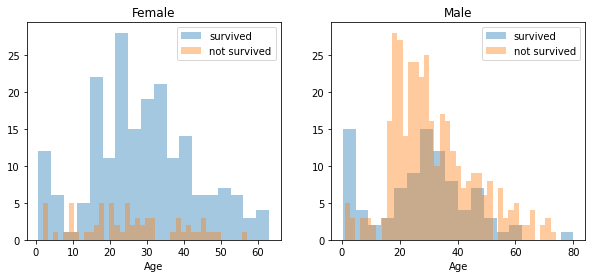

In [9]:
########################################
#Feature selection######################
########################################

#We plot the distributions of survival for different age and sex
#x is the age and y is the number of survived or not survived

#Conclusion, what can we conclude ???


#Age and sex
survived = 'survived'
not_survived = 'not survived'
#Now we plot only 2 empty graphs
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

#Here we plot first graph - Female
women = train_df[train_df['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

#Here we plot second graph - Male
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


In [10]:
#You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also 
#a little bit true for women but not fully. 

#For women the survival chances are higher between 14 and 40.
#For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. 
#Another thing to note is that infants also have a little bit higher probability of survival.

#Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, 
#I will create age groups later on.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


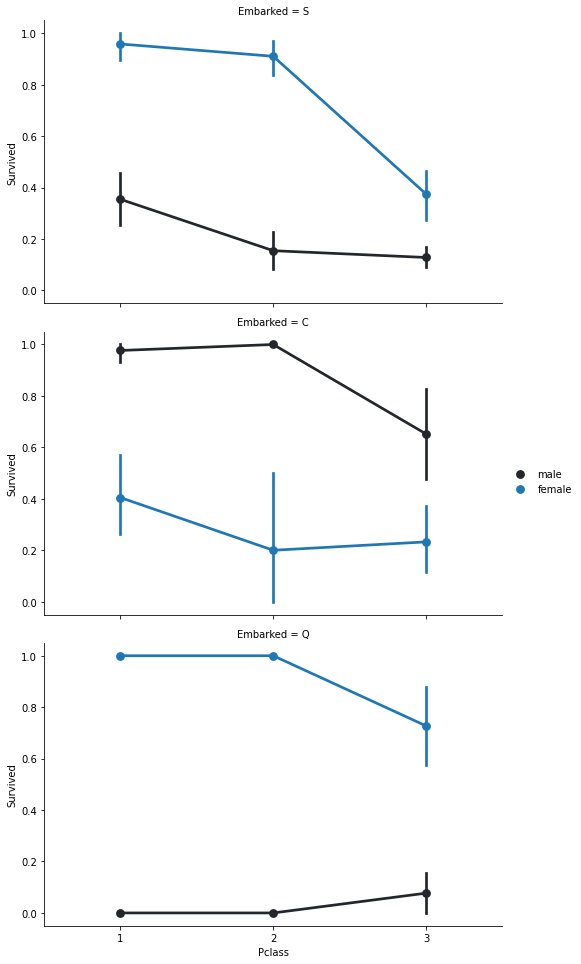

In [11]:
#Embarked, Pclass and Sex:
#Here x is pclass and y is survived
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [12]:
#Embarked seems to be correlated with survival, depending on the gender. WHY???????????????
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
#Pclass also seems to be correlated with survival. We will generate another plot of it below.

In [13]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(train_df, alpha=0.2, figsize=(12, 12), diagonal="kde");

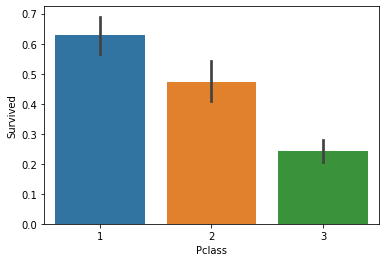

In [14]:
#Pclass
#Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.
sns.barplot(x='Pclass', y='Survived', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


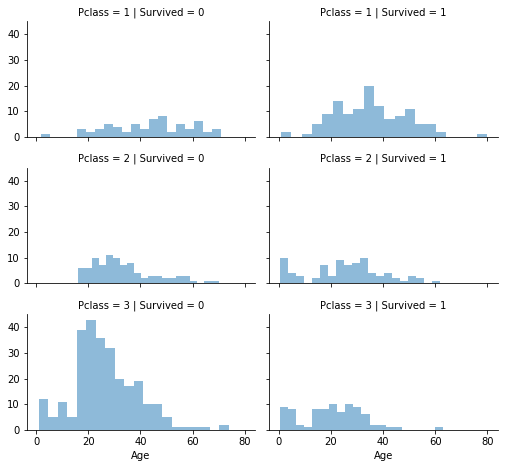

In [15]:
#The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.
#High change of survival in Pclass 1
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [16]:
#SibSp and Parch:
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. 
#I will create it below and also a feature that sows if someone is not alone.
data = [train_df, test_df]
#We add 2 columns for both datasets train_df and test_df
for dataset in data:
    #First column relatives is the number of family
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    #The second column can take values 1 or 0 to say if the customer is alone or not
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


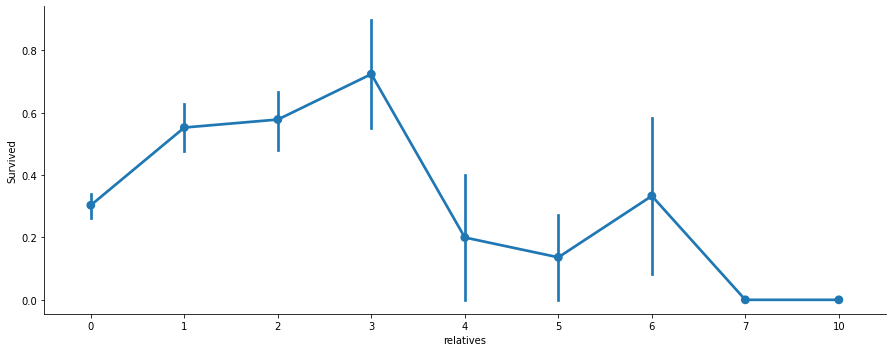

In [17]:
#Here we plot relatives vs survived
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )
#you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [18]:
#Data Preprocessing
#First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. 
#I will not drop it from the test set, since it is required there for the submission.
train_df = train_df.drop(['PassengerId'], axis=1)

In [19]:
#4. Data preprocessing
#A. Missing Data:
#Cabin:
#For cabin we decided to delete it as we are many missing items, we have only 687 out of 891
#However, we noticed that the first letter of Cabin ex. U4564 is the deck or the floor
#Hence, we decided to add a new column and delete Cabin
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
#Fill na with U0 
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
#This code of regular expression will give us the first letter of the string ex.  re.compile("([a-zA-Z]+)").search("U465456").group() returns U
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#We change each letter with the code variable deck above
    dataset['Deck'] = dataset['Deck'].map(deck)
#We fill na with 0    
    dataset['Deck'] = dataset['Deck'].fillna(0)
#We convert to int
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [20]:
re.compile("([a-zA-Z]+)").search("U465456").group()

'U'

In [21]:
#Age
#I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.
data = [train_df, test_df]
for dataset in data:
    #calculate mean and standard deviation of age  
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    #compute the number of missing cells in column age    
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    #First we copy column age in age_slice, we do copy as we do not want to change original datasets train_df and test_df ex. https://www.geeksforgeeks.org/python-difference-between-pandas-copy-and-copying-through-variables/
    age_slice = dataset["Age"].copy()
    #we fill missing cells in age_slice with rand_range
    age_slice[np.isnan(age_slice)] = rand_age
    #we put the content of age_slice in dataset["age"]
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [22]:
#Emarked
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
#Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [24]:
#B.Converting features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [25]:
#Fare, conversting Fare to int
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
#Name, we want to extrat the titles from the names and use it in our model 
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    #Replace Mlle with Miss and others
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers, see above variable titles
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [27]:
#Sex, convert into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [28]:
#Ticket
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [29]:
#Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [30]:
#Embarked: Convert it into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [31]:
#4. Creating Categories (binning)
#Age
#Now we need to convert the ‘age’ feature. First we will convert it from float into integer. 
#Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. 
#Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
# let's see how it's distributed train_df['Age'].value_counts()

In [32]:
#Fare:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [33]:
#For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. 
#But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. 
#Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [34]:
#5. Creating new Features
#1. Age times Class, we create a new feature that is multiplication of Age and Pclass
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
#2. Fare per Person, we create a new feature which is Fare (price) per person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [35]:
#Building Machine Learning Models
#X_Train contains the features
X_train = train_df.drop("Survived", axis=1)
#Building Machine Learning Models
#Y_train contains the label
Y_train = train_df["Survived"]
#X_Test contains the features in the test dataset, we copy as we do not want to change original dataset -> https://www.geeksforgeeks.org/python-difference-between-pandas-copy-and-copying-through-variables/
X_test  = test_df.drop("PassengerId", axis=1).copy()
 


In [36]:
#Stochastic Gradient Descent (SGD):
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [37]:
#Random Forest:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [38]:
#Logistic Regression:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
#K Nearest Neighbor:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [40]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [41]:
#Perceptron:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [42]:
#Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [44]:
grid_search = {
    'max_depth' : [2, 3, 5, 7, 9 ,12],
    'min_samples_leaf' : [2, 5, 10, 20, 50], 
    'min_samples_split' : [2, 5, 10, 20, 50]
}

from sklearn.model_selection import GridSearchCV, cross_val_score

model = DecisionTreeClassifier()

clf = GridSearchCV(estimator=model, param_grid=grid_search, cv=5)

clf.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]})

In [45]:
clf.cv_results_

{'mean_fit_time': array([0.0062201 , 0.00529809, 0.00471449, 0.01180167, 0.00472088,
        0.00543623, 0.00531569, 0.0073792 , 0.00492654, 0.01043038,
        0.01441317, 0.01895628, 0.02012973, 0.01323123, 0.01203794,
        0.00410857, 0.01036692, 0.01179852, 0.00301371, 0.00280571,
        0.0028717 , 0.00297699, 0.00304193, 0.00358748, 0.00330157,
        0.00286479, 0.00346212, 0.00287523, 0.00279489, 0.00311613,
        0.00277114, 0.00313406, 0.00365696, 0.00332284, 0.00306597,
        0.00303946, 0.00312786, 0.00302048, 0.00299096, 0.0032855 ,
        0.00311365, 0.00335689, 0.00391932, 0.00298181, 0.00293183,
        0.00284066, 0.00289669, 0.0029242 ]),
 'mean_score_time': array([0.00447583, 0.00301542, 0.00289025, 0.00455289, 0.00294056,
        0.00326014, 0.00321746, 0.00292139, 0.00308733, 0.00251484,
        0.012535  , 0.0055182 , 0.01052732, 0.0158587 , 0.00570922,
        0.00254703, 0.00597634, 0.0040792 , 0.00177574, 0.00163155,
        0.00159674, 0.00169129, 0.

In [46]:
clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [75]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2, min_samples_leaf=3)
#model = clf.best_estimator_

model.fit(X_train, Y_train)

from sklearn.metrics import classification_report

print(classification_report(Y_train, model.predict(X_train)))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.78      0.75      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



In [59]:
model.predict_proba(X_train)

array([[0.90625   , 0.09375   ],
       [0.12244898, 0.87755102],
       [0.37795276, 0.62204724],
       ...,
       [0.37795276, 0.62204724],
       [0.52830189, 0.47169811],
       [0.90625   , 0.09375   ]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


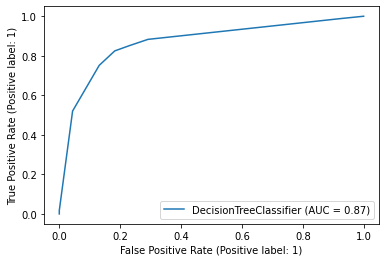

In [76]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_train, Y_train)

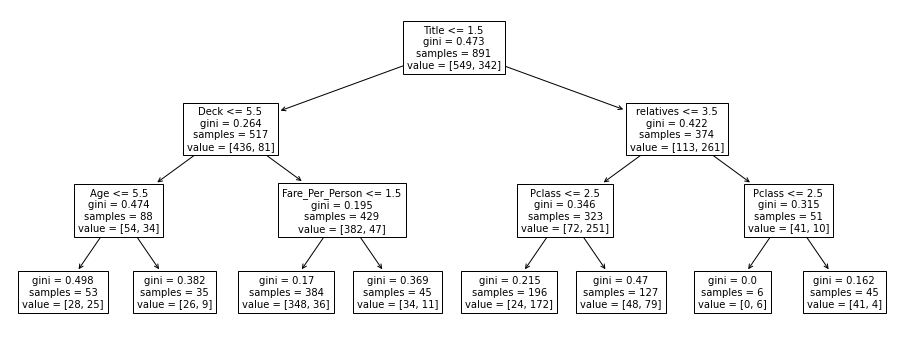

In [77]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 6))
plot_tree(model, fontsize=10, feature_names=X_train.columns)
plt.show()

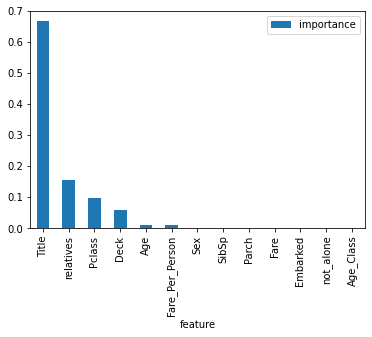

In [78]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(15)

importances.plot.bar()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


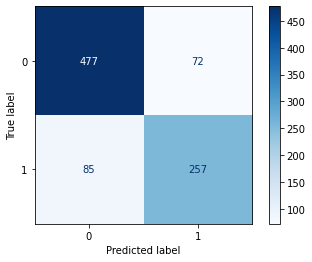

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, Y_train, cmap='Blues')

In [49]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [50]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
85.75,KNN
81.59,Support Vector Machines
81.59,Logistic Regression
79.12,Stochastic Gradient Decent
77.89,Naive Bayes
76.77,Perceptron


**Cross Validation**
The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get’s trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get’s trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

**dsc7**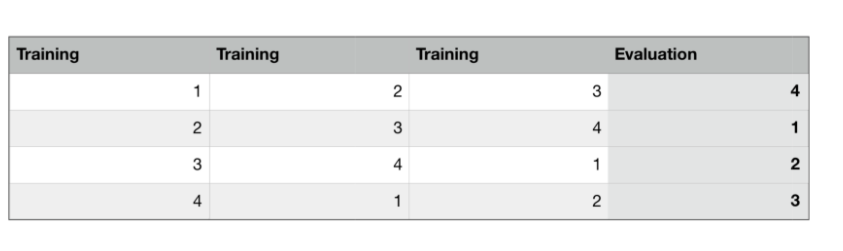


In [51]:
#K-Fold Cross Validation: K-Fold Cross Validation randomly splits the training data into K subsets called folds.
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
#The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.80898876 0.74157303 0.85393258 0.84269663 0.84269663
 0.83146067 0.7752809  0.86516854 0.83146067]
Mean: 0.8193258426966292
Standard Deviation: 0.03626551359527044


Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .
This means in our case that the accuracy of our model can differ + — 4%.

**What is Random Forest ?**
Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.
To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

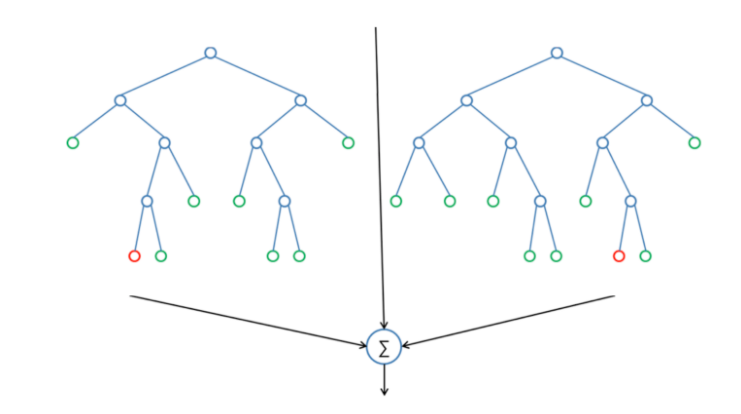

In [52]:
#Random Forest
#Feature Importance
#Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. 
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
Sex,0.185
Title,0.184
Age_Class,0.093
Deck,0.091
Pclass,0.078
Age,0.073
Fare,0.071
relatives,0.058
Embarked,0.051


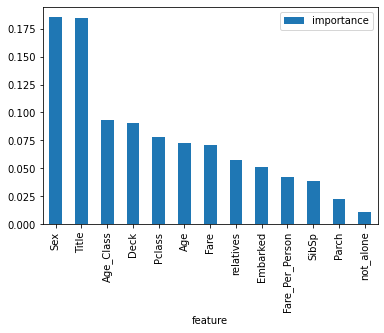

In [53]:
importances.plot.bar()

**Conclusion:**

not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again.

In [54]:
#Conclusion, remove not_alone and parch
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [55]:
# Training random forest again:
# Random Forest
#n_estimators is the number of trees you want to build before taking the maximum voting or averages of predictions.
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.82 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

In [56]:
#need explanation of oob score, There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. 
#Out of bag (OOB) score is a way of validating the Random forest model.
#https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.71000000000001 %


In [57]:
#Hyperparameter Tuning
#min_samples_leaf: The minimum number of samples required to be at a leaf node.
#min_samples_split specifies the minimum number of samples required to split an internal node
#n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
#Gini index and entropy are the criteria for calculating information gain.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

KeyboardInterrupt: ignored

In [ ]:
#very light version
#Hyperparameter Tuning
#min_samples_leaf: The minimum number of samples required to be at a leaf node.
#min_samples_split specifies the minimum number of samples required to split an internal node
#n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. 

param_grid = { "criterion" : ["gini"], "min_samples_leaf" : [1], "min_samples_split" : [2], "n_estimators": [100]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

In [ ]:
#Test new Parameters:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
#Out of bag (OOB) score is a way of validating the Random forest model.
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

**Further Evaluation**

Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it’s more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

In [ ]:
#Further Evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

**Confusion Matrix**

The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 93 passengers where wrongly classified as survived (false negatives) and 249 where correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

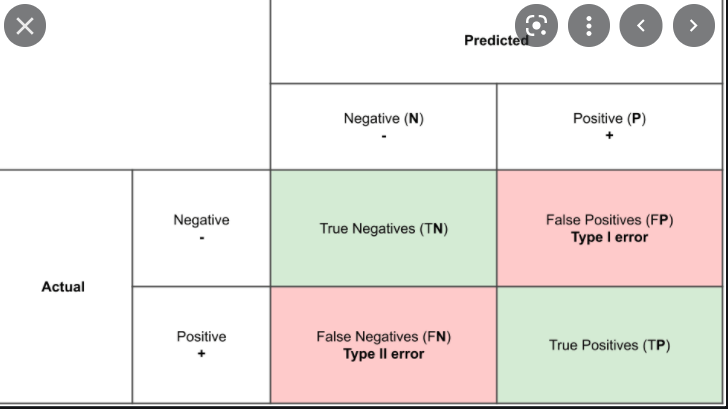

In [ ]:
#Precision and Recall:  
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

#Our model predicts 81% of the time, a passengers survival correctly (precision). 
#The recall tells us that it predicted the survival of 73 % of the people who actually survived.

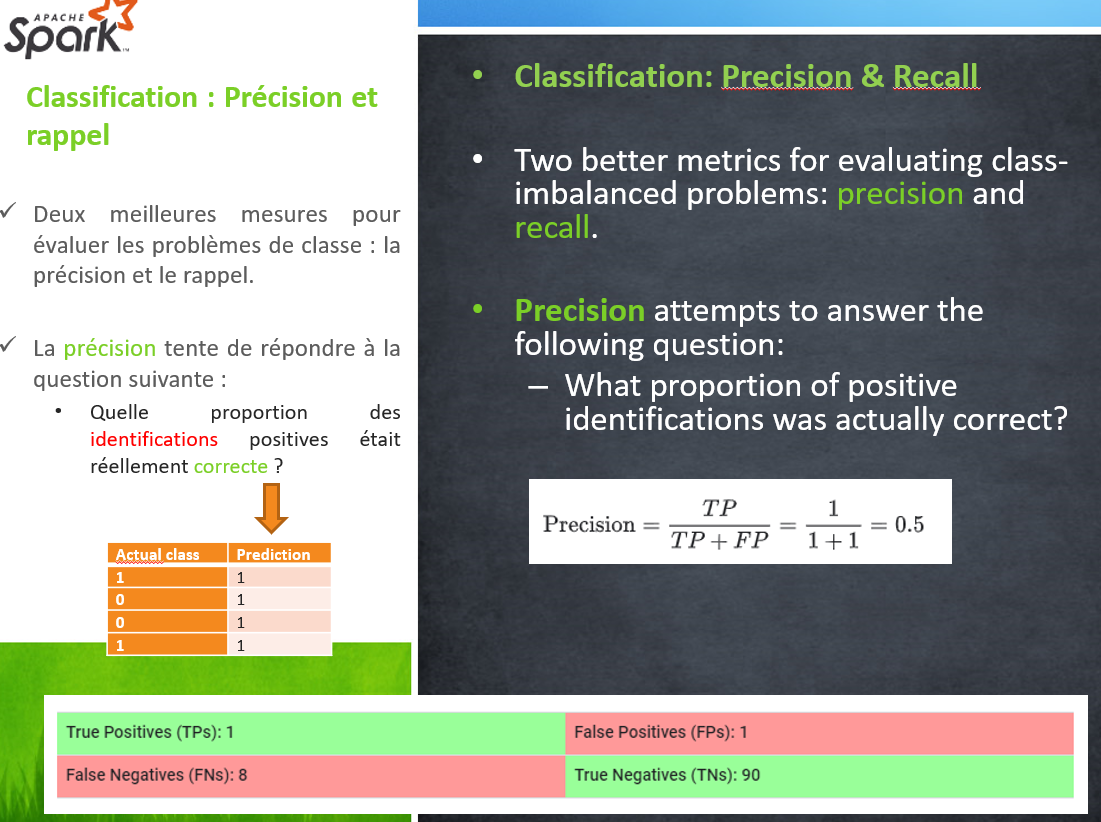

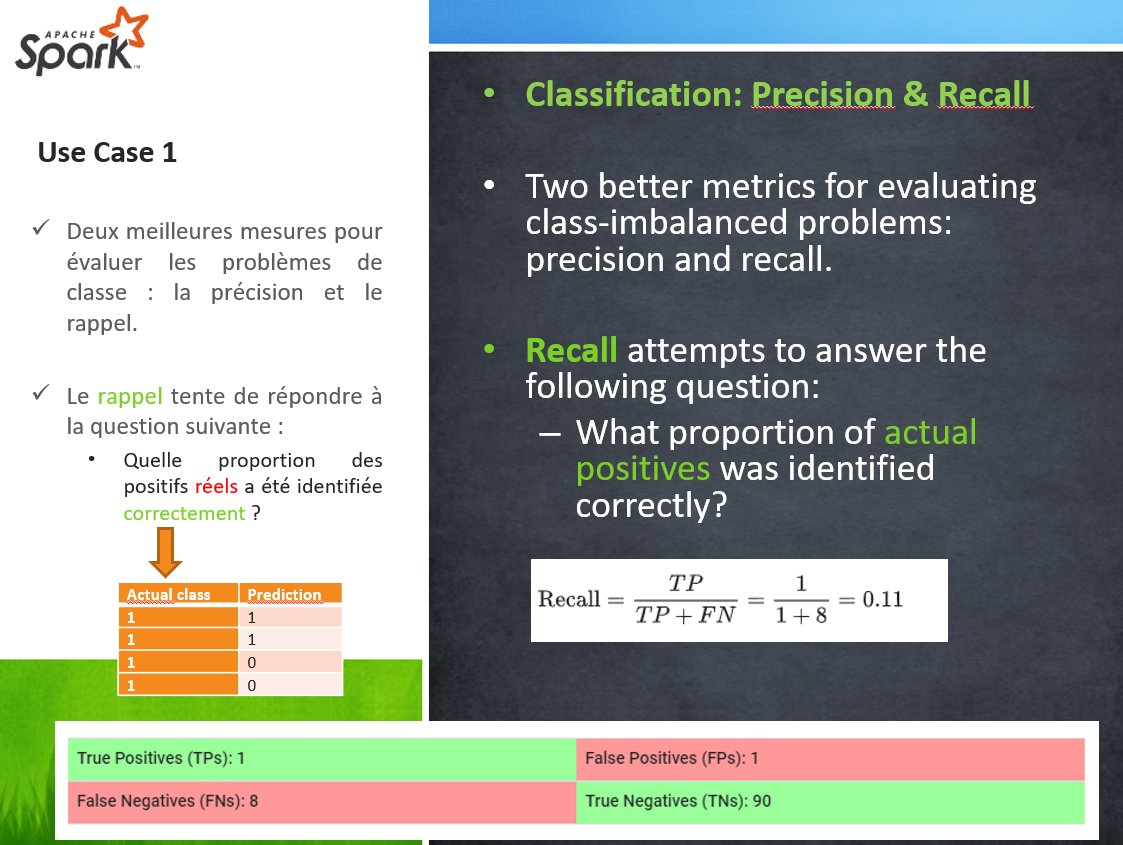

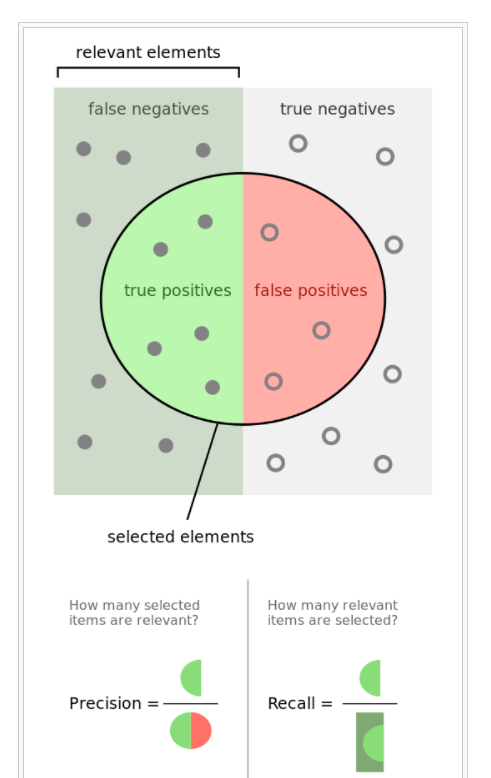

In [ ]:
#F-Score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

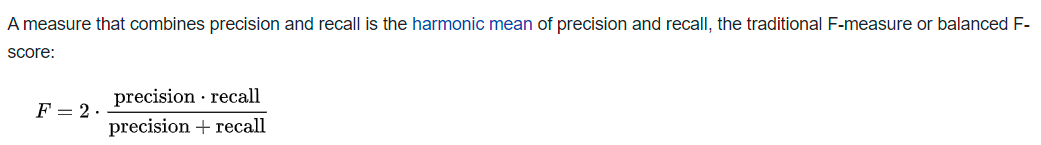

There we have it, a 77 % F-score. The score is not that high, because we have a recall of 73%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. 

This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.

In [ ]:
#Precision Recall Curve
#We will plot the precision and recall with the threshold using matplotlib:

from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [ ]:
#Another way is to plot the precision and recall against each other:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [ ]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
#ROC AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)